## Preprocessing

In [126]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("https://static.bc-edx.com/data/dla-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [127]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(["EIN", "NAME", "SPECIAL_CONSIDERATIONS"], axis=1)

In [128]:
# view the dataframe
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,142590,1


In [129]:
# Determine the number of unique values in each column.
print(application_df.nunique())


APPLICATION_TYPE      17
AFFILIATION            6
CLASSIFICATION        71
USE_CASE               5
ORGANIZATION           4
STATUS                 2
INCOME_AMT             9
ASK_AMT             8747
IS_SUCCESSFUL          2
dtype: int64


In [130]:
# Look at APPLICATION_TYPE value counts for binning
application_df["APPLICATION_TYPE"].value_counts()

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T15        2
T29        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [131]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = ["T9", "T13", "T12", "T2", "T25", "T14", "T29", "T15", "T17"]

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [132]:
# Look at CLASSIFICATION value counts for binning
application_df["CLASSIFICATION"].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C2380        1
C1728        1
C8210        1
C1283        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [133]:
# You may find it helpful to look at CLASSIFICATION value counts >1
vc = application_df["CLASSIFICATION"].value_counts().loc[lambda x : x>1]
vc

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C2300       32
C7200       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1278       10
C1238       10
C1237        9
C1235        9
C7210        7
C1720        6
C4100        6
C2400        6
C1257        5
C1600        5
C2710        3
C0           3
C1260        3
C1234        2
C1267        2
C1256        2
C3200        2
C1246        2
Name: CLASSIFICATION, dtype: int64

In [134]:
# Choose a cutoff value and create a list of classifications to be replaced
x = ["C1000", "C2000", "C1200", "C3000", "C2100"]

In [135]:
# use the variable name `classifications_to_replace`
classifications_to_replace = []
for i in application_df["CLASSIFICATION"]:
    if i not in x:
        classifications_to_replace.append(i)
    else:
        pass            

In [136]:
# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [137]:
# Convert categorical data to numeric with `pd.get_dummies`
application_df = pd.get_dummies(data=application_df, columns=["APPLICATION_TYPE", "CLASSIFICATION", "AFFILIATION", "USE_CASE", "ORGANIZATION"])

In [138]:
application_df.head()

,STATUS,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,...,AFFILIATION_Regional,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust
0,1,0,5000,1,0,1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1,1,1-9999,108590,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
2,1,0,5000,0,0,0,0,0,0,1,...,0,0,0,0,0,1,1,0,0,0
3,1,10000-24999,6692,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
4,1,100000-499999,142590,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1


In [139]:
# checking value_counts of our target variable
application_df["IS_SUCCESSFUL"].value_counts()

1    18261
0    16038
Name: IS_SUCCESSFUL, dtype: int64

In [140]:
application_df = application_df.reindex(columns=[col for col in application_df.columns if col != "IS_SUCCESSFUL"]+['IS_SUCCESSFUL'])
application_df.head()

,STATUS,INCOME_AMT,ASK_AMT,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,IS_SUCCESSFUL
0,1,0,5000,0,1,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1
1,1,1-9999,108590,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,1
2,1,0,5000,0,0,0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,0
3,1,10000-24999,6692,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,1
4,1,100000-499999,142590,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,1


In [141]:
application_df["INCOME_AMT"].value_counts()

0                24388
25000-99999       3747
100000-499999     3374
1M-5M              955
1-9999             728
10000-24999        543
10M-50M            240
5M-10M             185
50M+               139
Name: INCOME_AMT, dtype: int64

In [142]:
bins = [0, 5000, 15000, 50000, 250000, 2500000, 7000000, 30000000, 50000000]

# Encoding the income column using a custom function
def encode_income(income):
    """
    This function encodes marital status by setting yes as 1 and no as 0.
    """
    if income == "1-9999":
        return 5000
    elif income == "10000-24999":
        return 15000
    elif income == "25000-99999":
        return 50000
    elif income == "100000-499999":
        return 250000
    elif income == "1M-5M":
        return 2500000
    elif income == "5M-10M":
        return 7000000
    elif income == "10M-50M":
        return 30000000
    elif income == "50M+":
        return 50000000
    
    else:
        return 0

# Call the encode_marriage function on the marriage column
application_df["INCOME_AMT"] = application_df["INCOME_AMT"].apply(encode_income)



In [143]:
# Review the DataFrame 
application_df.head()

,STATUS,INCOME_AMT,ASK_AMT,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,IS_SUCCESSFUL
0,1,0,5000,0,1,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1
1,1,5000,108590,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,1
2,1,0,5000,0,0,0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,0
3,1,15000,6692,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,1
4,1,250000,142590,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,1


In [144]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"]

X = application_df.drop("IS_SUCCESSFUL", axis=1)
feature_names = X.columns
X.head(20)


,STATUS,INCOME_AMT,ASK_AMT,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,AFFILIATION_Regional,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust
0,1,0,5000,0,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1,1,5000,108590,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,1,0,5000,0,0,0,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0
3,1,15000,6692,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,1,250000,142590,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
5,1,0,5000,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
6,1,250000,31452,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
7,1,30000000,7508025,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
8,1,5000,94389,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
9,1,0,5000,0,0,0,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0


In [145]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [146]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [158]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

# to start with, going with 6 neurons each into 2 input layers and 1 output layer

nn_model = tf.keras.models.Sequential()

# First hidden layer
nn_model.add(tf.keras.layers.Dense(units=6, activation="relu", input_dim=33))

nn_model.add(tf.keras.layers.Dense(units=6, activation="relu"))

# Output layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 6)                 204       
                                                                 
 dense_25 (Dense)            (None, 6)                 42        
                                                                 
 dense_26 (Dense)            (None, 1)                 7         
                                                                 
Total params: 253
Trainable params: 253
Non-trainable params: 0
_________________________________________________________________


In [159]:
# Compile the model
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 1s 785us/step - loss: 0.6019 - accuracy: 0.6903
Epoch 2/100
804/804 [==============================] - 1s 792us/step - loss: 0.5659 - accuracy: 0.7221
Epoch 3/100
804/804 [==============================] - 1s 784us/step - loss: 0.5631 - accuracy: 0.7233
Epoch 4/100
804/804 [==============================] - 1s 766us/step - loss: 0.5619 - accuracy: 0.7233
Epoch 5/100
804/804 [==============================] - 1s 778us/step - loss: 0.5605 - accuracy: 0.7241
Epoch 6/100
804/804 [==============================] - 1s 790us/step - loss: 0.5601 - accuracy: 0.7239
Epoch 7/100
804/804 [==============================] - 1s 769us/step - loss: 0.5593 - accuracy: 0.7241
Epoch 8/100
804/804 [==============================] - 1s 793us/step - loss: 0.5589 - accuracy: 0.7257
Epoch 9/100
804/804 [==============================] - 1s 775us/step - loss: 0.5585 - accuracy: 0.7278
Epoch 10/100
804/804 [==============================] - 1s 854us/step - l

In [154]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5573 - accuracy: 0.7338 - 312ms/epoch - 1ms/step
Loss: 0.5573438405990601, Accuracy: 0.7337609529495239


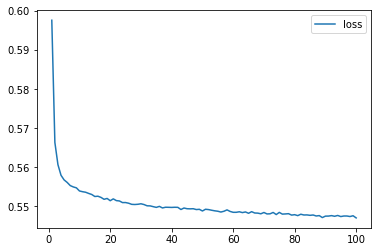

In [157]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss
history_df.plot(y="loss")

In [38]:
# Export our model to HDF5 file
#  YOUR CODE GOES HERE

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 80)                3520      
_________________________________________________________________
dense_1 (Dense)              (None, 30)                2430      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 5,981
Trainable params: 5,981
Non-trainable params: 0
_________________________________________________________________
